# Laboratorio 2 - Agrupación

*   Jaime Torres - 202014866
*   Juan Guillermo Gutiérrez - 202122659
*   Maria Luisa Rodríguez -202121549

In [284]:
# Instalación de librerias
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import re
import joblib

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import  SnowballStemmer, WordNetLemmatizer
from nltk.corpus import wordnet as wn

pd.options.mode.chained_assignment = None

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marlu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marlu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marlu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\marlu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\marlu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


## 1) Preparación de Datos

MediAlpes ha solicitado una evaluación de la factibilidad de aplicar técnicas de agrupación sobre la onformación de pacientes suministrada previamente, para identificar patrones y características comunes que puedan optimizar su toma de decisiones y mejorar su eficiencia en la atención médica. 

A continuación, se cargan los datos: 


In [285]:
url = 'https://github.com/BI-DATASCIENCE/Lab2/raw/main/data/'
lab_data: pd.DataFrame = pd.read_csv(url + 'Lab2_data.csv')
raw_data = lab_data.copy()
raw_data


,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Queja_Principal,Estado_Mental,Dolor,dolor_NRS,SBP,...,BT,Saturacion,KTAS_enfermera,Diagnostico_En_Urgencias,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Duracion_KTAS_Min,Error_Triaje
0,2,2,49,2,1,ant. chest pain,1,1,2,150.0,...,36.2,98.0,2,Ischaemic chest pain,2,2,0,1591,"2,00",0
1,2,2,30,4,1,headache,1,1,4,140.0,...,36.3,99.0,3,"Subarachnoid haemorrhage, unspecified",7,3,0,211,"3,00",0
2,2,1,61,3,2,ant. chest pain,1,1,3,100.0,...,36.4,98.0,4,Contusion of front wall of thorax,1,4,0,119,"2,00",0
3,2,2,61,3,1,headache,1,1,4,120.0,...,36.5,99.0,4,Headache,1,3,4,414,"2,00",2
4,1,2,67,3,1,fever & chill,1,0,#BOÞ!,143.0,...,38.1,NaN,4,Fever,1,2,1,267,"3,60",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,73,4,1,fever,1,0,#BOÞ!,117.0,...,36.8,NaN,4,Fever,2,4,0,620,"9,75",0
996,1,1,27,3,1,Suicidal Attempt,1,0,#BOÞ!,110.0,...,36.2,NaN,3,Suicide tendency,2,3,0,442,"7,42",0
997,1,2,54,2,1,"pain, chest",1,1,6,159.0,...,36.6,NaN,2,Gastroesophageal reflux disease,1,2,0,214,"4,95",0
998,1,1,19,3,1,eye discomfort,1,0,#BOÞ!,132.0,...,36.5,NaN,4,Corneal erosion,1,4,0,50,"3,45",0


### 1.1) Entendimiento de los Datos

En los datos proporcionados, hay un total de 1000 filas, cada una representando un paciente diferente que ha sido atendido por MediAlpes en emergencias. Para cada paciente, hay 23 variables distintas que fueron tomadas para el análisis de los datos :

In [286]:
raw_data.shape

(1000, 23)

De las 23 variables proporcionadas, 13 son numéricas, 6 son de tipo float y las demás son de tipo object, lo que puede indicar que podrían ser de tipo string 

In [287]:
raw_data.dtypes

Grupo                         int64
Sexo                          int64
Edad                          int64
Modo_Llegada                  int64
Lesion                        int64
Queja_Principal              object
Estado_Mental                 int64
Dolor                         int64
dolor_NRS                    object
SBP                         float64
DBP                         float64
HR                          float64
RR                          float64
BT                          float64
Saturacion                  float64
KTAS_enfermera                int64
Diagnostico_En_Urgencias     object
Disposicion                   int64
KTAS_experto                  int64
Grupo_De_Error                int64
Duracion_Estancia_Min         int64
Duracion_KTAS_Min            object
Error_Triaje                  int64
dtype: object

Para cada paciente, se evaluan los siguientes aspectos mediante distintas variables:
- Grupo: grupo del paciente
- Perfil del paciente: incluye variables que describen las características del paciente, como su sexo y edad. 
- Modo de llegada: explica como llego el paciente a la central de emergencias mediante una categorización entre 5 valores distintos. 
- Lesion: indica si el paciente tiene una lesión mediante una categorización de 2 valores. 
- Queja principal: variable de tipo string que indica la queja principal del paciente
- Estado mental: describe el estado mental del paciente mediante una categorización entre 4 valores distintos. 
- Dolor del paciente: medido en dos variables (Dolor y Dolor_NRS), se verifica si el paciente siente dolor, y, posteriormente,  cuanto dolor siente en una escala del 1 al 10. 
- Signos vitales: se miden los siguientes signos vitales de cada paciente ('SBP', 'DBP', 'HR', 'RR', 'BT','Saturacion')
- Evaluación KTAS: se mide el puntaje dado en la escala del KTAS, tanto por un experto como por una enfermera. Luego, se elimina cuanto se demoró esa clasificación.
- Errores: Errores en la asignación del grupo o del score del triage. 
- Diagnóstico: variable string que indica el diagnóstico dado en urgencias. (Diagnostico_En_Urgencias)
- Duración de estancia: indica, en minutos, cuanto tiempo se mantuvo el paciente en la central de emergencias. 
- Disposición: indica la disposicion del paciente mediante una categorización entre 7 valores distintos. 

In [288]:
raw_data.columns

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Queja_Principal',
       'Estado_Mental', 'Dolor', 'dolor_NRS', 'SBP', 'DBP', 'HR', 'RR', 'BT',
       'Saturacion', 'KTAS_enfermera', 'Diagnostico_En_Urgencias',
       'Disposicion', 'KTAS_experto', 'Grupo_De_Error',
       'Duracion_Estancia_Min', 'Duracion_KTAS_Min', 'Error_Triaje'],
      dtype='object')

Hay valores distintos de nulls en cada columna, por lo cual se evidencia que hay datos faltantes para varios pacientes. No hay columnas cuyos valores sean 100% nulos. 

In [289]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Grupo                     1000 non-null   int64  
 1   Sexo                      1000 non-null   int64  
 2   Edad                      1000 non-null   int64  
 3   Modo_Llegada              1000 non-null   int64  
 4   Lesion                    1000 non-null   int64  
 5   Queja_Principal           1000 non-null   object 
 6   Estado_Mental             1000 non-null   int64  
 7   Dolor                     1000 non-null   int64  
 8   dolor_NRS                 1000 non-null   object 
 9   SBP                       983 non-null    float64
 10  DBP                       979 non-null    float64
 11  HR                        988 non-null    float64
 12  RR                        985 non-null    float64
 13  BT                        989 non-null    float64
 14  Saturacio

Los datos numéricos se encuentran en distintas escalas, pues hay variables categóricas representadas mediante una escala numérica, y variables en una escala del 1 al 100, como por ejemplo, los signos vitales. No hay números negativos dentro de los datos, pero hay una desviación estándar particularmente grande en los valores de la columna "Duración_Estancia_Min". 

In [290]:
raw_data.describe()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Estado_Mental,Dolor,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Error_Triaje
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,983.000000,979.000000,988.000000,985.000000,989.000000,444.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.450000,1.514000,53.892000,2.811000,1.2000,1.103000,0.562000,133.485249,79.566905,84.400810,19.450761,36.562993,97.047297,3.328000,1.610000,3.260000,0.569000,12792.480000,0.253000
std,0.497743,0.500054,19.826483,0.796186,0.4002,0.431946,0.496389,27.156136,15.174593,16.297428,2.069882,0.519699,4.761112,0.862067,1.161572,0.865534,1.587375,87721.151446,0.630387
min,1.000000,1.000000,16.000000,1.000000,1.0000,1.000000,0.000000,50.000000,31.000000,32.000000,14.000000,35.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,36.000000,2.000000,1.0000,1.000000,0.000000,114.000000,70.000000,73.000000,18.000000,36.200000,97.000000,3.000000,1.000000,3.000000,0.000000,132.750000,0.000000
50%,1.000000,2.000000,56.000000,3.000000,1.0000,1.000000,1.000000,130.000000,80.000000,82.000000,20.000000,36.500000,98.000000,3.000000,1.000000,3.000000,0.000000,270.500000,0.000000
75%,2.000000,2.000000,70.250000,3.000000,1.0000,1.000000,1.000000,150.000000,90.000000,96.000000,20.000000,36.800000,99.000000,4.000000,2.000000,4.000000,0.000000,620.000000,0.000000
max,2.000000,2.000000,94.000000,7.000000,2.0000,4.000000,1.000000,275.000000,160.000000,148.000000,30.000000,39.800000,100.000000,5.000000,7.000000,5.000000,9.000000,709510.000000,2.000000


Antes de mirar los boxplots de cada variable, se eliminan los outliers de Duracion_Estancia_Min, que superen un valor de 200,000, pues estos son casos exepcionales que podrían agregar ruido al análisis. 

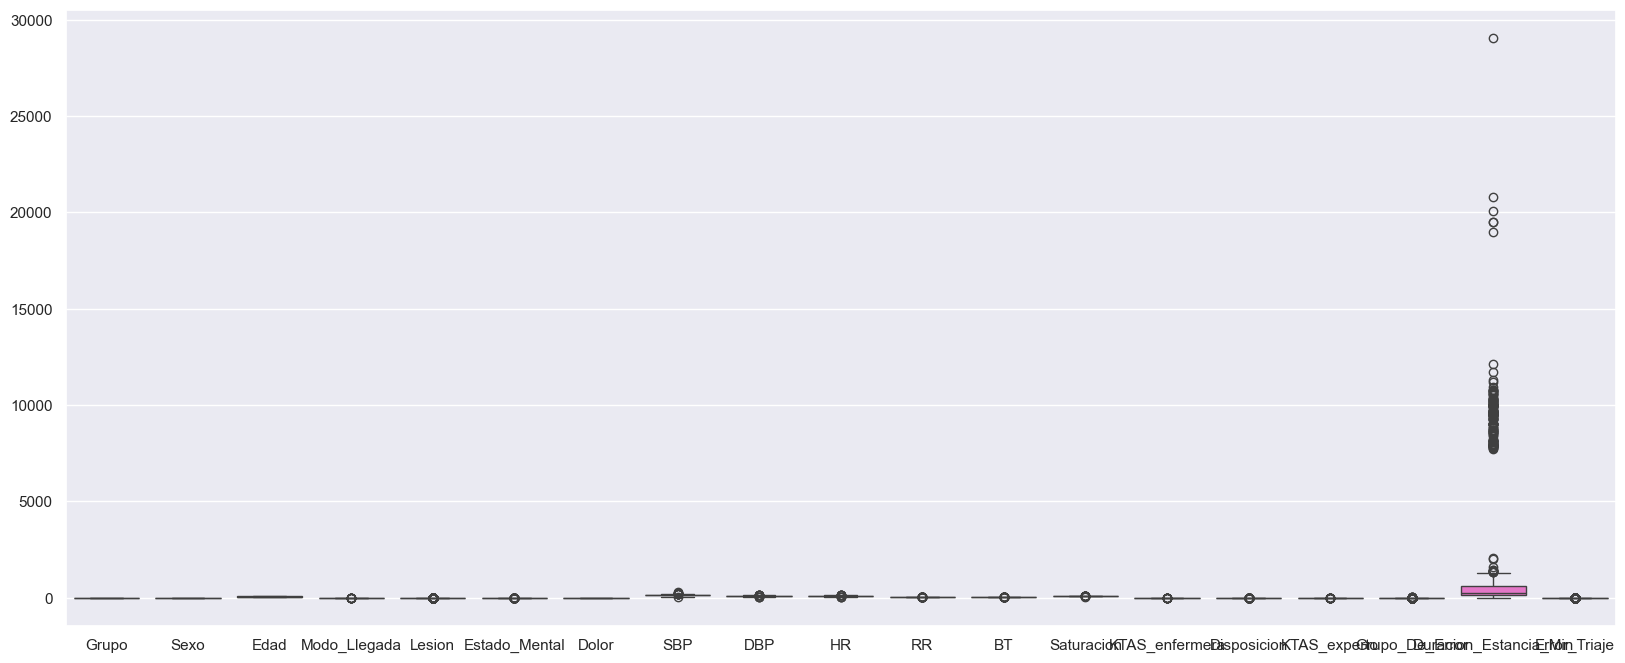

In [291]:
raw_data.drop(raw_data[raw_data.Duracion_Estancia_Min > 200000].index, inplace=True)


fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=raw_data, orient="v")


Duración_Estancia_Min sigue teniendo la desviación estándar más grande de todos los valores numéricos, con un valor máximo cercano a los 30,000 minutos. Las demás variables no sobrepasan el 100. 

En cuanto a los datos no numéricos, se realizará una comparación entre las quejas principales y los diagnósticos dados, para observar su impacto en la agrupación que se realizará. Hay 344 quejas distintas entre los 1000 pacientes, con "abd pain" siendo la más común, y con varias quejas teniendo una sola aparición en los datos entregados. 

In [292]:
raw_data['Queja_Principal'].value_counts()

Queja_Principal
abd pain                               61
dizziness                              53
dyspnea                                42
ant. chest pain                        37
fever                                  29
                                       ..
For  IV injection                       1
right lower quadrant abdominal pain     1
Sexual Abuse of Adult                   1
laceration, scalp                       1
otalgia, Rt.                            1
Name: count, Length: 344, dtype: int64

Por otra parte, hay un total de 480 diagnósticos para 1000 pacientes, lo que indica que casi la mitad de los pacientes tienen un diagnóstico distinto, con el diagnóstico más comú siento "Acute gastroenteritis". 

In [293]:
raw_data['Diagnostico_En_Urgencias'].value_counts()

Diagnostico_En_Urgencias
Acute gastroenteritis                            39
Headache                                         23
Dizziness                                        20
Unspecified abdominal pain                       19
Ischaemic chest pain                             17
                                                 ..
Ingested mushrooms, toxic effect of               1
Pain in limb, hip (joint)                         1
Colon cancer, sigmoid                             1
Postnasal drip syndrome                           1
Traumatic secondary and recurrent haemorrhage     1
Name: count, Length: 480, dtype: int64

Hay una diferencia de 136 entre la cantidad de quejas y la cantidad de diagnósticos, lo que indica que su relación no es completamente directa, y que pueden haber distintos diagnósticos para una misma queja. Asimismo, hay un paciente que posee información de su queja principal pero no de su diagnóstico en urgencias. 

In [294]:
non_number = ['Queja_Principal', 'Diagnostico_En_Urgencias']
raw_data[non_number].describe()

,Queja_Principal,Diagnostico_En_Urgencias
count,984,983
unique,344,480
top,abd pain,Acute gastroenteritis
freq,61,39


### 1.2) Selección de Variables Relevantes

Se realiza un análisis sobre la relación entre las variables numéricas para verificar que su colinealidad no sea muy alta, lo cual podría afectar llos resultados del análisis de la agrupación. Los valores más cercanos a 1 indican una relación directamente proporcional, mientras que los valores cercanos a -1 indican una relación inversamente proporcional.

<Axes: >

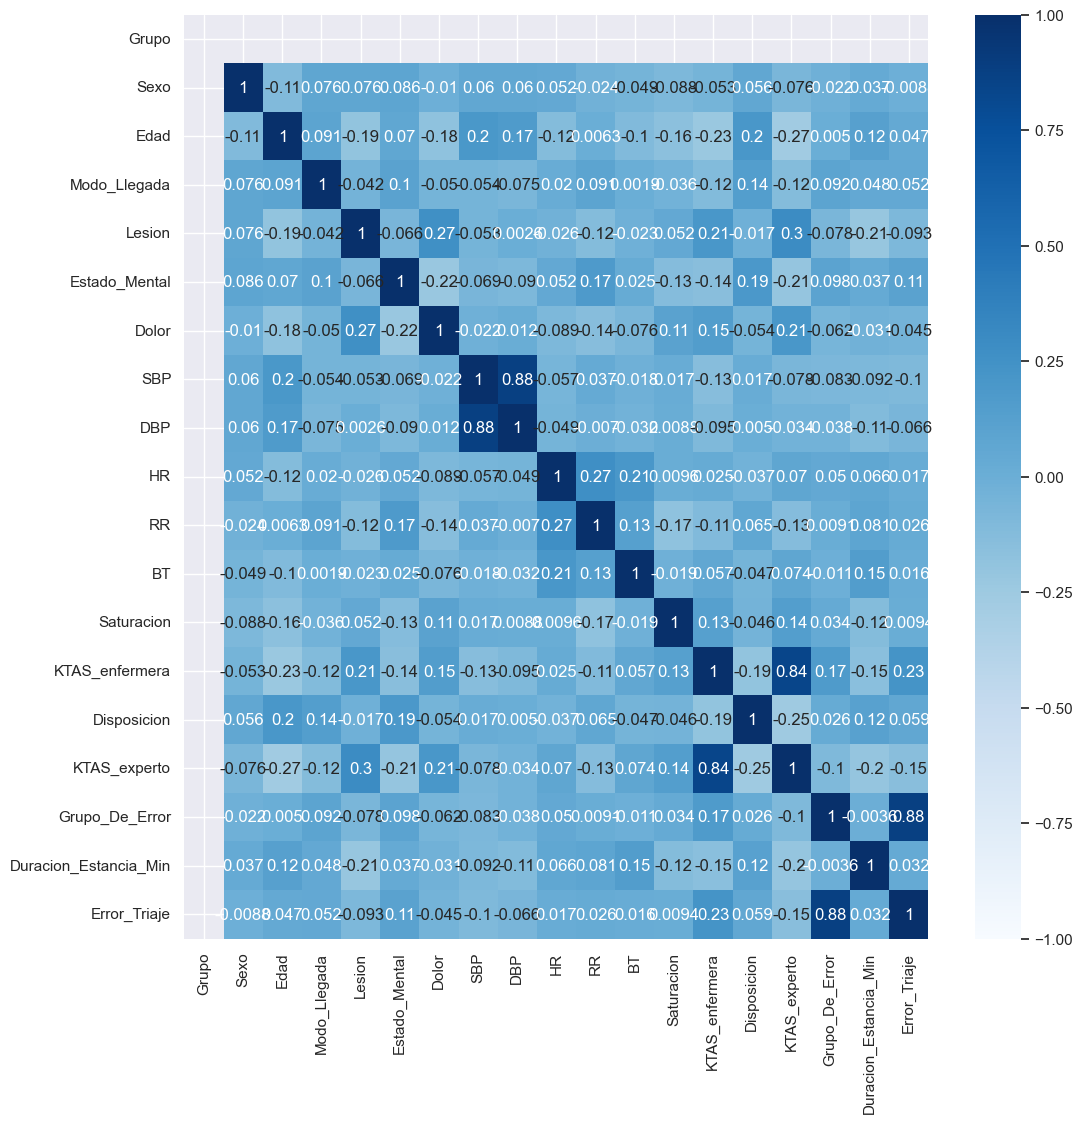

In [295]:
vit_filter = raw_data.drop(columns=['Queja_Principal', 'Diagnostico_En_Urgencias', 'dolor_NRS', 'Duracion_KTAS_Min'])
filtered_ya = vit_filter.dropna()
plt.figure(figsize=(12, 12))
sns.heatmap(filtered_ya.corr(), cmap="Blues", vmin=-1, vmax=1, annot = True)

Mediante el heatmap se evidencian tres pares de variables estrechamente relacionadas, con coeficientes iguales o mayores a 0.83. Para eliminar la multicolinealidad entre estas variables, se debe eliminar una de ellas antes de utilizarlas para entrenar los modelos. Aisimismo, se eliminan las variables cuyo aporte al análisis sea de poca importancia. 

In [296]:
cols_drop = ['Grupo', 'Modo_Llegada', 'Grupo_De_Error', 'Error_Triaje', 'KTAS_enfermera', 'DBP']
raw_data = raw_data.drop(columns=cols_drop)

print("Siguiendo estas convenciones, las variables que se prepararán para el modelo son: ")
list(raw_data.columns)

Siguiendo estas convenciones, las variables que se prepararán para el modelo son: 


['Sexo',
 'Edad',
 'Lesion',
 'Queja_Principal',
 'Estado_Mental',
 'Dolor',
 'dolor_NRS',
 'SBP',
 'HR',
 'RR',
 'BT',
 'Saturacion',
 'Diagnostico_En_Urgencias',
 'Disposicion',
 'KTAS_experto',
 'Duracion_Estancia_Min',
 'Duracion_KTAS_Min']

### 1.3) Completitud

Para una preparación correcta de los modelos, se requieren datos que no tengan valores vacios, por lo cual se evalua la completitud de estos a continuación:




In [297]:
# Cálculo de porcentaje de valores nulos por columna
((raw_data.isnull().sum()/raw_data.shape[0])).sort_values(ascending=False)

Saturacion                  0.565041
SBP                         0.017276
RR                          0.015244
HR                          0.012195
BT                          0.011179
Diagnostico_En_Urgencias    0.001016
Duracion_Estancia_Min       0.000000
KTAS_experto                0.000000
Disposicion                 0.000000
Sexo                        0.000000
Edad                        0.000000
dolor_NRS                   0.000000
Dolor                       0.000000
Estado_Mental               0.000000
Queja_Principal             0.000000
Lesion                      0.000000
Duracion_KTAS_Min           0.000000
dtype: float64

Hay 6 variables con valores nulos, la mayoria de los cuales no sobrepasan el 2% de su contenido. Sin embargo, la variable "Saturación" cuenta con un 56% de valores nulos en su columna. Debido a que su colinealidad con otras variables es muy cercana a cero, y teniendo en cuenta que se estan midiendo otros 4 signos vitales, esta columna será eliminada. Para el resto de los valores, debido a que representan un porcentaje extremadamente bajo de nulos y debido a que su desvación estándar no es muy alta, estos serán reemplazados por la moda de sus respectivas columnas.

In [298]:
cols_drop = ['Saturacion']
raw_data = raw_data.drop(columns=cols_drop)

columnas = ['SBP', 'RR', 'HR', 'BT']

for col in columnas:
    moda = raw_data[col].mode()[0]
    raw_data[col].fillna(moda, inplace=True)

((raw_data.isnull().sum()/raw_data.shape[0])).sort_values(ascending=False)

C:\Users\marlu\AppData\Local\Temp\ipykernel_29944\1411508677.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data[col].fillna(moda, inplace=True)


Diagnostico_En_Urgencias    0.001016
Sexo                        0.000000
Edad                        0.000000
Lesion                      0.000000
Queja_Principal             0.000000
Estado_Mental               0.000000
Dolor                       0.000000
dolor_NRS                   0.000000
SBP                         0.000000
HR                          0.000000
RR                          0.000000
BT                          0.000000
Disposicion                 0.000000
KTAS_experto                0.000000
Duracion_Estancia_Min       0.000000
Duracion_KTAS_Min           0.000000
dtype: float64

### 1.4) Unicidad

Posteriormente, se verifica que no existan filas 100% repetidas, pues esto indica que hay pacientes con dos entradas distintas en los datos proporcionados. Se verifica la cantidad de filas identicas: 


In [299]:
raw_data.duplicated(keep = False).sum()

64

Estos valores repetidos pueden llegar a afectar las decisiones tomadas por los modelos, por lo cual se eliminan los duplicados y se verifica que la suma de duplicados ahora sea 0. 

In [300]:
raw_data = raw_data.drop_duplicates()
raw_data.duplicated(keep = False).sum()

0

### 1.5) Consistencia

La columna Dolor_NRS cuenta con varios valores que no pueden ser interpretados. Al examinar la columna con detalle, estos valores deberían ser 0, pues corresponden a las filas en las que los pacientes no sienten dolor (Dolor = 0). Entonces, se reemplazan estas innstancias por el valor adecuado, y se corrigen las filas en las que un Dolor_NRS no corresponda a Dolor = 0. 



In [301]:
#correccion de Dolor_NRS
raw_data['dolor_NRS'] = raw_data['dolor_NRS'].replace('#BOÞ!', 0)
print("Número de filas después de eliminar inconsistencias:", raw_data.shape[0])

inconsistencias_sin_dolor = raw_data[(raw_data['Dolor'] == 0) & (raw_data['dolor_NRS'] != 0)]
print("Inconsistencias sin dolor:", inconsistencias_sin_dolor.shape[0])

inconsistencias_con_dolor = raw_data[(raw_data['Dolor'] == 1) & (raw_data['dolor_NRS'] == 0)]
print("Inconsistencias con dolor:", inconsistencias_con_dolor.shape[0])

raw_data = raw_data[~((raw_data['Dolor'] == 0) & (raw_data['dolor_NRS'] != 0)) & ~((raw_data['Dolor'] == 1) & (raw_data['dolor_NRS'] == 0))]
print("Número de filas después de eliminar inconsistencias:", raw_data.shape[0])

raw_data = raw_data.drop('Dolor',axis=1)

Número de filas después de eliminar inconsistencias: 952
Inconsistencias sin dolor: 0
Inconsistencias con dolor: 2
Número de filas después de eliminar inconsistencias: 950


Se elimina la columna "Dolor", pues esta directamente relacionada con Dolor_NRS, pero esta proporciona más detalle.

De las variables numéricas que serán analizadas, varias son realmente variables categóricas representadas por números. Se utiliza One Hot Encoding para ccrear columnas binarias que permitan ver cada valor como una categoría distinta y no como una escala numérica. Se elimina la primera columna creada para reducir la multicolinealidad entre las variables: 

In [302]:
#one hot encoding
cat_cols = ['Sexo','Lesion', 'Estado_Mental', 'Disposicion', 'KTAS_experto']

raw_data = pd.get_dummies(raw_data, columns=cat_cols, drop_first=True, dtype=int)
print(raw_data.head())

   Edad  Queja_Principal dolor_NRS    SBP     HR    RR    BT  \
0    49  ant. chest pain         2  150.0   92.0  20.0  36.2   
1    30         headache         4  140.0   76.0  20.0  36.3   
2    61  ant. chest pain         3  100.0   84.0  20.0  36.4   
3    61         headache         4  120.0   76.0  20.0  36.5   
4    67    fever & chill         0  143.0  130.0  20.0  38.1   

                Diagnostico_En_Urgencias  Duracion_Estancia_Min  \
0                   Ischaemic chest pain                   1591   
1  Subarachnoid haemorrhage, unspecified                    211   
2      Contusion of front wall of thorax                    119   
3                               Headache                    414   
4                                  Fever                    267   

  Duracion_KTAS_Min  ...  Disposicion_2  Disposicion_3  Disposicion_4  \
0              2,00  ...              1              0              0   
1              3,00  ...              0              0            

### 1.6) Validez

Todos los valores se encuentran en un rango valido y con valores validos, per la columna "Duracion_KTAS_Min" no puede ser entendida por el modelo debido a que utiliza una coma para indicar un valor decimal en vez de un punto. Se corrige este error para utilizar la variable de manera apropiada: 

In [303]:
columnas_numericas = raw_data.select_dtypes(include=['number']).columns
raw_data = raw_data[(raw_data[columnas_numericas] >= 0).all(axis=1)]

raw_data["Duracion_KTAS_Min"].astype(str)
raw_data["Duracion_KTAS_Min"] = raw_data["Duracion_KTAS_Min"].str.replace(",", ".")
raw_data["Duracion_KTAS_Min"] = pd.to_numeric(raw_data["Duracion_KTAS_Min"], errors='coerce')
raw_data["Duracion_KTAS_Min"]




0       2.00
1       3.00
2       2.00
3       2.00
4       3.60
       ...  
962     2.00
963     4.00
964     2.00
965    11.32
966    13.28
Name: Duracion_KTAS_Min, Length: 950, dtype: float64

### 1.7) Preparación de Datos No Numéricos

Para comprobar si los datos no numericos tienen una relevancia para la agrupación, es necesario transformarlos de forma que puedan ser entendidos por los modelos de la misma manera como se entienden las demás variables. En primer lugar, se reemplazan los errores de codificación, se transforman en minúsculas, se les quita la puntuación y se reemplaza los valores '?' por la clasificación 'unknown', para indicar un valor desconocido. 

In [304]:
#limpieza

def corregir_caracteres(texto):
    if isinstance(texto, str):
        texto = texto.replace('Ã¡', 'á').replace('Ã©', 'é').replace('Ã­', 'í')
        texto = texto.replace('Ã³', 'ó').replace('Ãº', 'ú').replace('Ã±', 'ñ')
        texto = texto.replace('Ã', 'í').replace('Â', '')
        texto = texto.replace('â€œ', '').replace('â€', '').replace('â€˜', '').replace('â€™', '')
    return texto

# poner todo en minuscula
def to_lowercase(palabras):
  return [palabra.lower() for palabra in palabras]


#quitar puntuación
def remove_punctuation(palabras):
  new_words = []
  for word in palabras:
    if word is not None:
      new_word = re.sub(r'[^\w\s]', '', word)
      if new_word != '':
         new_words.append(new_word)
  return new_words

#reemplazar ?
def set_unknown(palabras):
  new_words = []
  for word in palabras:
    if '?' in word:
      new_words.append('unknown')
    else:
      new_words.append(word)
  return new_words

def preprocessing(palabras):
    palabras = corregir_caracteres(palabras)
    palabras = to_lowercase(palabras)
    palabras = remove_punctuation(palabras)
    palabras = set_unknown(palabras)
    return palabras

Posteriormente, las palabras son tokenizadas:

In [305]:
raw_data['Diagnostico_En_Urgencias'] = raw_data['Diagnostico_En_Urgencias'].fillna('unknown')

raw_data['Queja_Principal'] = raw_data['Queja_Principal'].apply(word_tokenize)
raw_data['Diagnostico_En_Urgencias'] = raw_data['Diagnostico_En_Urgencias'].apply(word_tokenize)

raw_data['Queja_Principal'] = raw_data['Queja_Principal'].apply(preprocessing)
raw_data['Diagnostico_En_Urgencias'] = raw_data['Diagnostico_En_Urgencias'].apply(preprocessing)

raw_data

,Edad,Queja_Principal,dolor_NRS,SBP,HR,RR,BT,Diagnostico_En_Urgencias,Duracion_Estancia_Min,Duracion_KTAS_Min,...,Disposicion_2,Disposicion_3,Disposicion_4,Disposicion_5,Disposicion_6,Disposicion_7,KTAS_experto_2,KTAS_experto_3,KTAS_experto_4,KTAS_experto_5
0,49,"[ant, chest, pain]",2,150.0,92.0,20.0,36.2,"[ischaemic, chest, pain]",1591,2.00,...,1,0,0,0,0,0,1,0,0,0
1,30,[headache],4,140.0,76.0,20.0,36.3,"[subarachnoid, haemorrhage, unspecified]",211,3.00,...,0,0,0,0,0,1,0,1,0,0
2,61,"[ant, chest, pain]",3,100.0,84.0,20.0,36.4,"[contusion, of, front, wall, of, thorax]",119,2.00,...,0,0,0,0,0,0,0,0,1,0
3,61,[headache],4,120.0,76.0,20.0,36.5,[headache],414,2.00,...,0,0,0,0,0,0,0,1,0,0
4,67,"[fever, chill]",0,143.0,130.0,20.0,38.1,[fever],267,3.60,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,64,[dysarthria],0,130.0,98.0,20.0,36.4,"[cerebral, infarction, due, to, thrombosis, of...",356,2.00,...,1,0,0,0,0,0,0,1,0,0
963,70,"[dz, dizziness]",0,180.0,80.0,20.0,36.0,"[vestibular, neuronitis]",456,4.00,...,0,0,0,0,0,0,1,0,0,0
964,75,[dysarthria],0,120.0,68.0,20.0,36.4,"[cerebrovascular, accident, nos]",278,2.00,...,1,0,0,0,0,0,0,1,0,0
965,26,"[sexual, violence]",0,117.0,83.0,16.0,36.0,"[sexual, abuse, of, adult]",199,11.32,...,0,0,0,0,0,0,0,0,1,0


Por último, se utiliza el WordNetLemmatizer para reducir los tokens a su forma normalizada para que pueda intepretar conceptos identicos descritos de manera distinta como uno solo. Por ejemplo, 'abd' y 'abdominal' para referirse a la región abdominal. 

In [306]:
#normalizacion
def lemm_words(tokens):
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(token.lower()) for token in tokens]

raw_data['Queja_Principal'] = raw_data['Queja_Principal'].apply(lemm_words)
raw_data['Diagnostico_En_Urgencias'] = raw_data['Diagnostico_En_Urgencias'].apply(lemm_words)
raw_data

,Edad,Queja_Principal,dolor_NRS,SBP,HR,RR,BT,Diagnostico_En_Urgencias,Duracion_Estancia_Min,Duracion_KTAS_Min,...,Disposicion_2,Disposicion_3,Disposicion_4,Disposicion_5,Disposicion_6,Disposicion_7,KTAS_experto_2,KTAS_experto_3,KTAS_experto_4,KTAS_experto_5
0,49,"[ant, chest, pain]",2,150.0,92.0,20.0,36.2,"[ischaemic, chest, pain]",1591,2.00,...,1,0,0,0,0,0,1,0,0,0
1,30,[headache],4,140.0,76.0,20.0,36.3,"[subarachnoid, haemorrhage, unspecified]",211,3.00,...,0,0,0,0,0,1,0,1,0,0
2,61,"[ant, chest, pain]",3,100.0,84.0,20.0,36.4,"[contusion, of, front, wall, of, thorax]",119,2.00,...,0,0,0,0,0,0,0,0,1,0
3,61,[headache],4,120.0,76.0,20.0,36.5,[headache],414,2.00,...,0,0,0,0,0,0,0,1,0,0
4,67,"[fever, chill]",0,143.0,130.0,20.0,38.1,[fever],267,3.60,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,64,[dysarthria],0,130.0,98.0,20.0,36.4,"[cerebral, infarction, due, to, thrombosis, of...",356,2.00,...,1,0,0,0,0,0,0,1,0,0
963,70,"[dz, dizziness]",0,180.0,80.0,20.0,36.0,"[vestibular, neuronitis]",456,4.00,...,0,0,0,0,0,0,1,0,0,0
964,75,[dysarthria],0,120.0,68.0,20.0,36.4,"[cerebrovascular, accident, no]",278,2.00,...,1,0,0,0,0,0,0,1,0,0
965,26,"[sexual, violence]",0,117.0,83.0,16.0,36.0,"[sexual, abuse, of, adult]",199,11.32,...,0,0,0,0,0,0,0,0,1,0


In [307]:
raw_data

,Edad,Queja_Principal,dolor_NRS,SBP,HR,RR,BT,Diagnostico_En_Urgencias,Duracion_Estancia_Min,Duracion_KTAS_Min,...,Disposicion_2,Disposicion_3,Disposicion_4,Disposicion_5,Disposicion_6,Disposicion_7,KTAS_experto_2,KTAS_experto_3,KTAS_experto_4,KTAS_experto_5
0,49,"[ant, chest, pain]",2,150.0,92.0,20.0,36.2,"[ischaemic, chest, pain]",1591,2.00,...,1,0,0,0,0,0,1,0,0,0
1,30,[headache],4,140.0,76.0,20.0,36.3,"[subarachnoid, haemorrhage, unspecified]",211,3.00,...,0,0,0,0,0,1,0,1,0,0
2,61,"[ant, chest, pain]",3,100.0,84.0,20.0,36.4,"[contusion, of, front, wall, of, thorax]",119,2.00,...,0,0,0,0,0,0,0,0,1,0
3,61,[headache],4,120.0,76.0,20.0,36.5,[headache],414,2.00,...,0,0,0,0,0,0,0,1,0,0
4,67,"[fever, chill]",0,143.0,130.0,20.0,38.1,[fever],267,3.60,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,64,[dysarthria],0,130.0,98.0,20.0,36.4,"[cerebral, infarction, due, to, thrombosis, of...",356,2.00,...,1,0,0,0,0,0,0,1,0,0
963,70,"[dz, dizziness]",0,180.0,80.0,20.0,36.0,"[vestibular, neuronitis]",456,4.00,...,0,0,0,0,0,0,1,0,0,0
964,75,[dysarthria],0,120.0,68.0,20.0,36.4,"[cerebrovascular, accident, no]",278,2.00,...,1,0,0,0,0,0,0,1,0,0
965,26,"[sexual, violence]",0,117.0,83.0,16.0,36.0,"[sexual, abuse, of, adult]",199,11.32,...,0,0,0,0,0,0,0,0,1,0


## 2) Modelamiento

In [308]:
raw_data.columns

Index(['Edad', 'Queja_Principal', 'dolor_NRS', 'SBP', 'HR', 'RR', 'BT',
       'Diagnostico_En_Urgencias', 'Duracion_Estancia_Min',
       'Duracion_KTAS_Min', 'Sexo_2', 'Lesion_2', 'Estado_Mental_2',
       'Estado_Mental_3', 'Estado_Mental_4', 'Disposicion_2', 'Disposicion_3',
       'Disposicion_4', 'Disposicion_5', 'Disposicion_6', 'Disposicion_7',
       'KTAS_experto_2', 'KTAS_experto_3', 'KTAS_experto_4', 'KTAS_experto_5'],
      dtype='object')

### 2.1) K-Means (p1)

estandarizacion de valores numericos, metodo del codo.

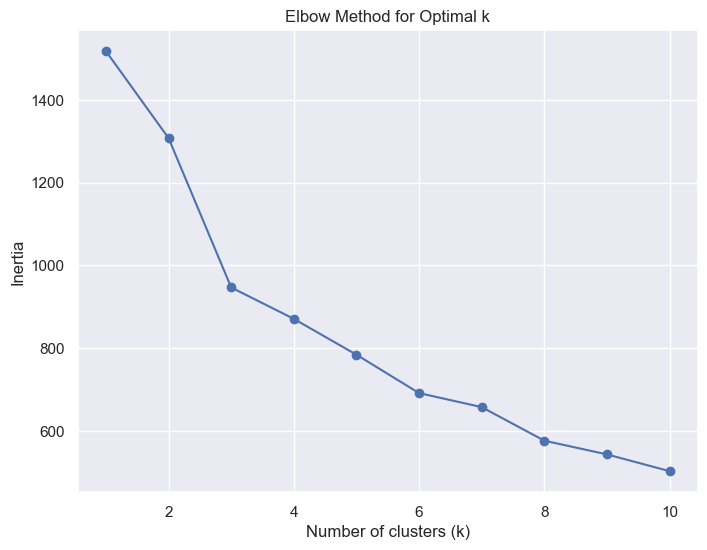

In [309]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

numerical_columns = raw_data.select_dtypes(include=[np.number]).columns
data_numerical = raw_data[numerical_columns]

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_numerical)

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



[0 1 2]


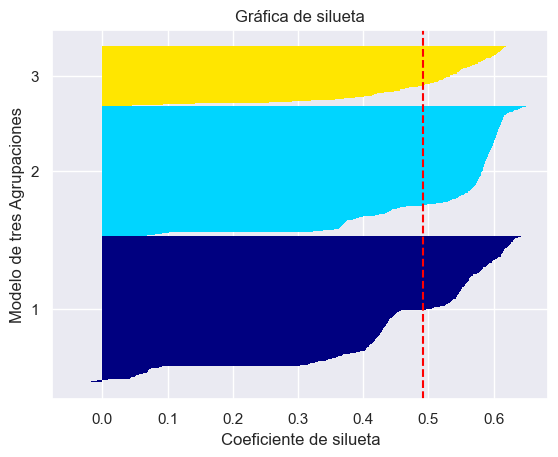

Silhouette Avg:  0.49185484262004664


In [310]:
def plot_silhouette(data,
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters

    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='cosine')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

    print("Silhouette Avg: ", silhouette_avg)

kmeans2 = KMeans(n_clusters=3, random_state=0)
res_kmeans2 = kmeans2.fit(data_normalized)

plot_silhouette(data = data_normalized,
                labels = res_kmeans2.labels_,
                ylabel = 'Modelo de tres Agrupaciones')

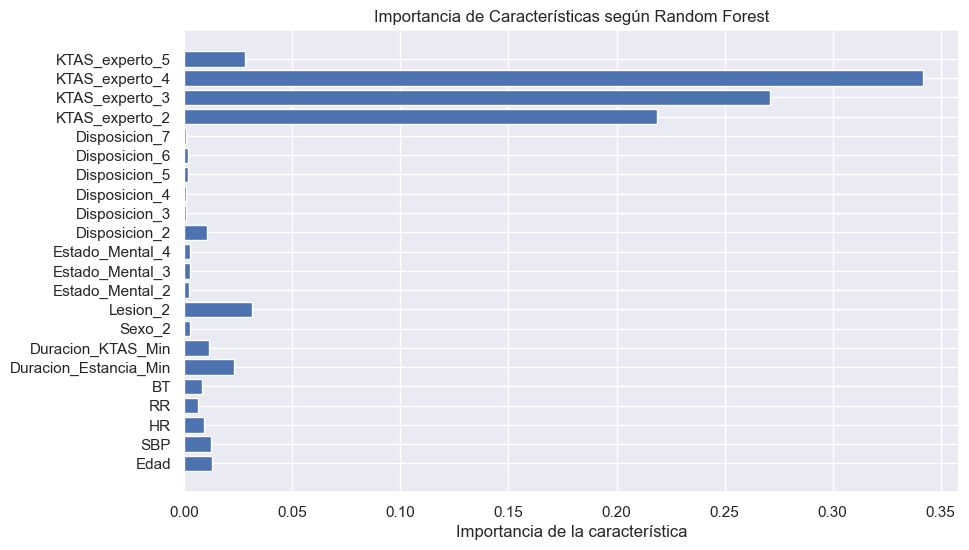

In [311]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

#usaremos el resultado de K-Means como "etiqueta" para entrenar el RandomForest
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_

# Entrenar un RandomForest para calcular la importancia de características
rf = RandomForestClassifier(random_state=42)
rf.fit(raw_data[numerical_columns], cluster_labels)

# Obtener la importancia de cada característica
importances = rf.feature_importances_
features = numerical_columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importancia de la característica')
plt.title('Importancia de Características según Random Forest')
plt.show()

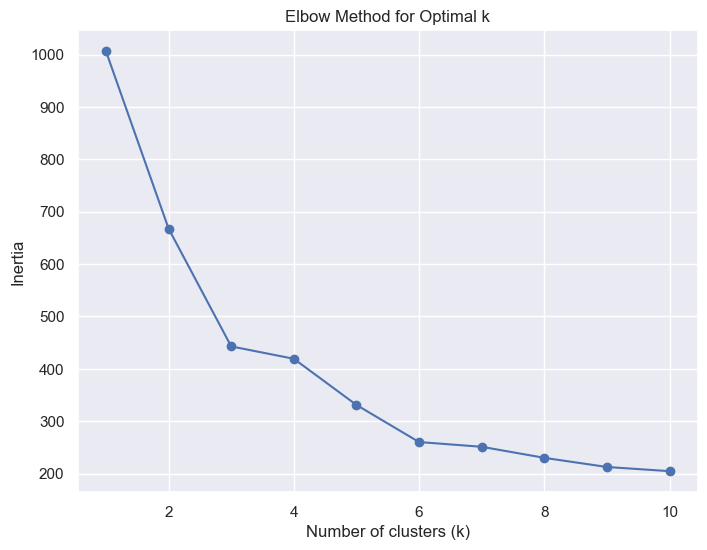

In [312]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

ktas_columns = ['Edad', 'dolor_NRS', 'SBP', 'HR', 'RR', 'BT', 'Duracion_Estancia_Min',
       'Duracion_KTAS_Min', 'Lesion_2',
       'KTAS_experto_2', 'KTAS_experto_3', 'KTAS_experto_4', 'KTAS_experto_5']

data_numerical = raw_data[ktas_columns]

# Normalizar datos
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_numerical)

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

[0 1 2]


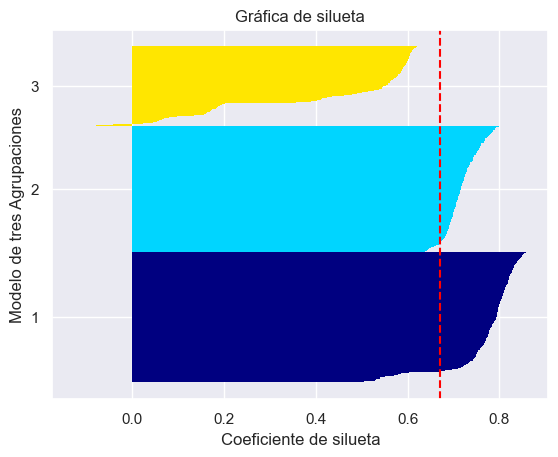

Silhouette Avg:  0.6697449917389313


In [313]:
kmeans2 = KMeans(n_clusters=3, random_state=0)
res_kmeans2 = kmeans2.fit(data_normalized)

plot_silhouette(data = data_normalized,
                labels = res_kmeans2.labels_,
                ylabel = 'Modelo de tres Agrupaciones')

### 2.2) DB-SCAN (p2)

Número estimado de clusters: 10
Número de puntos de ruido: 0


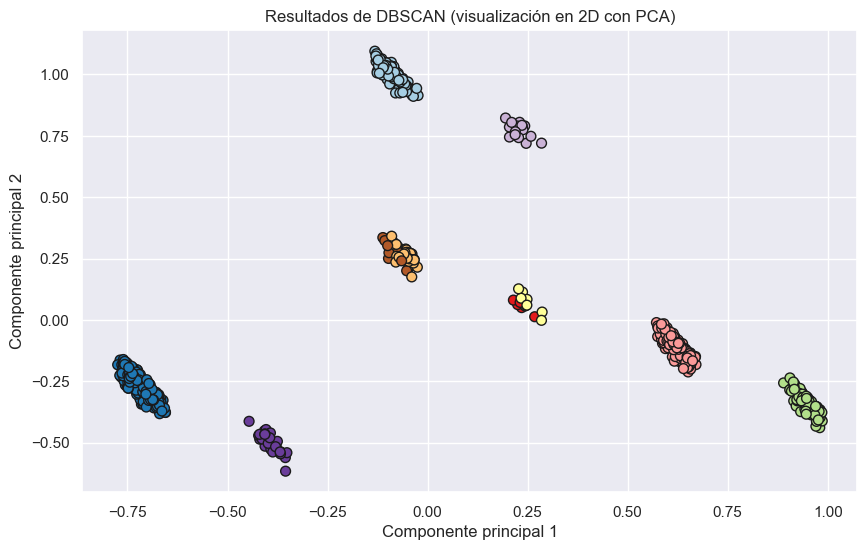

In [314]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Implementar DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(data_normalized)

labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Número estimado de clusters: {n_clusters_}')
print(f'Número de puntos de ruido: {list(labels).count(-1)}')

# aplicar PCA para reducirlo a dos dimensiones para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='Paired', s=50, edgecolors='k')
plt.title('Resultados de DBSCAN (visualización en 2D con PCA)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

[0 1 2 3 4 5 6 7 8 9]


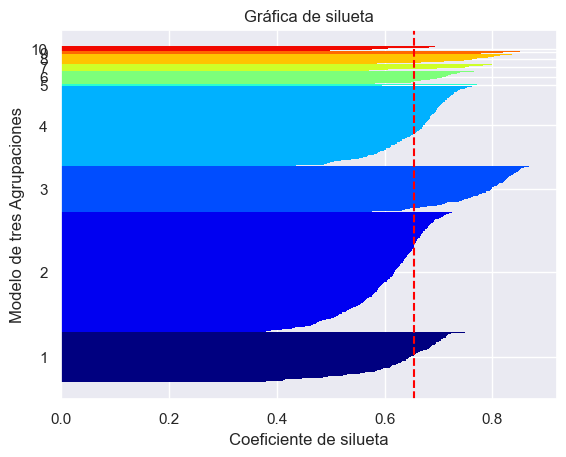

Silhouette Avg:  0.6549884642486684


In [315]:
dbscan = DBSCAN(eps=1, min_samples=5)
jelp = dbscan.fit(data_normalized)

plot_silhouette(data = data_normalized,
                labels = jelp.labels_,
                ylabel = 'Modelo de tres Agrupaciones')

### 2.3) Agglomerative Clustering (p3)

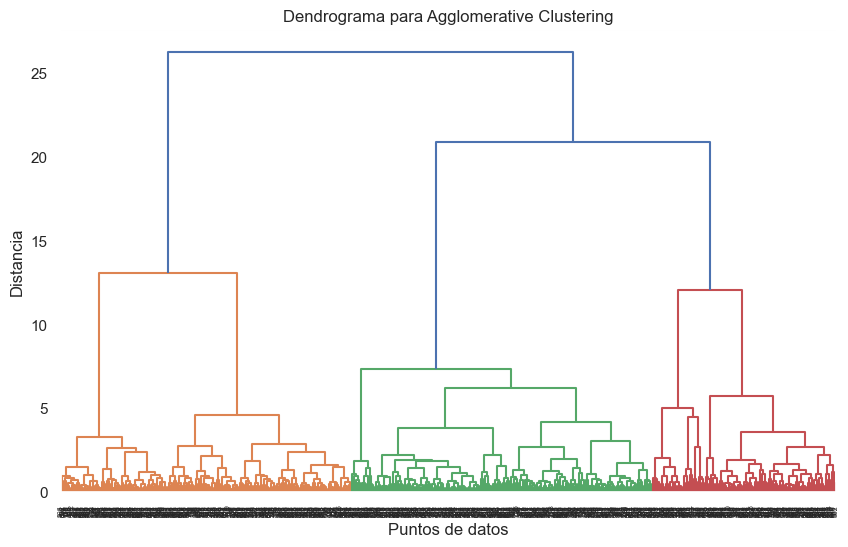

Coeficiente de silueta para 2 clusters: 0.35098316979181216
Coeficiente de silueta para 3 clusters: 0.45247767157110946
Coeficiente de silueta para 4 clusters: 0.44873082097309236
Coeficiente de silueta para 5 clusters: 0.48663195675537363
Coeficiente de silueta para 6 clusters: 0.4618500147575878
Coeficiente de silueta para 7 clusters: 0.3787705630195663
Coeficiente de silueta para 8 clusters: 0.3721453897911186
Coeficiente de silueta para 9 clusters: 0.3765326563819324
Coeficiente de silueta para 10 clusters: 0.3111772432680019


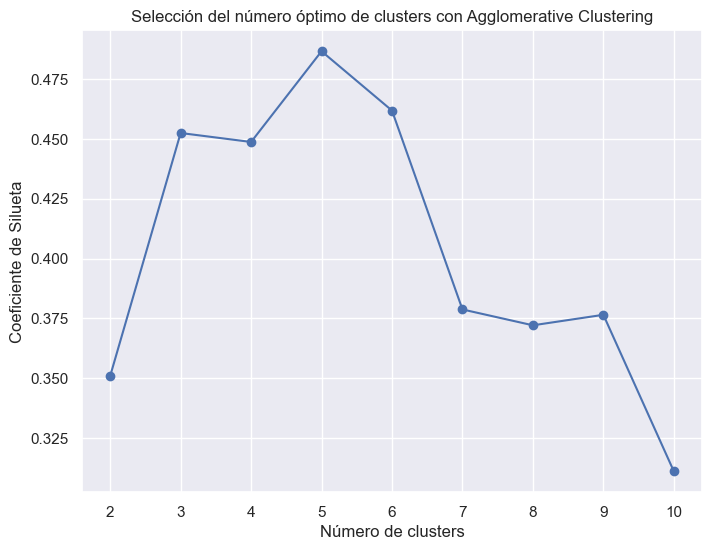

El número óptimo de clusters es: 5


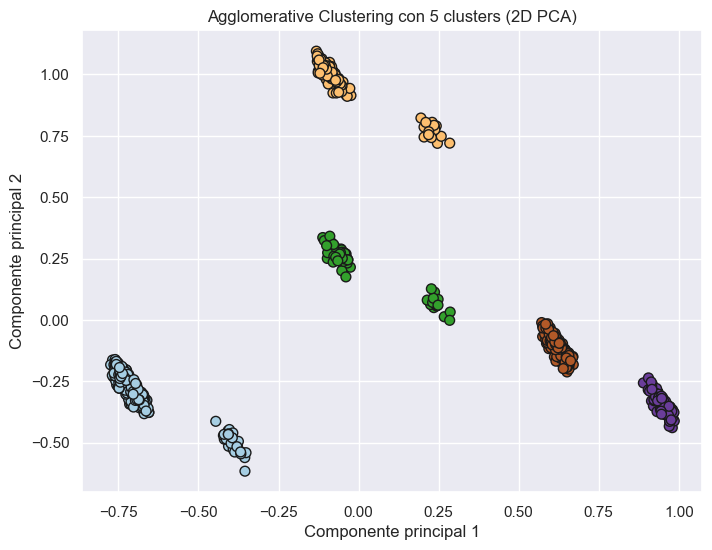

In [316]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# Función para dibujar un dendrograma para entender la estructura jerárquica
def plot_dendrogram(data, method='ward'):
    Z = linkage(data, method=method)
    plt.figure(figsize=(10, 6))
    dendrogram(Z)
    plt.title('Dendrograma para Agglomerative Clustering')
    plt.xlabel('Puntos de datos')
    plt.ylabel('Distancia')
    plt.show()

plot_dendrogram(data_normalized, method='ward')

# Definir el rango de n_clusters que vamos a probar
n_clusters_range = range(2, 11)
silhouette_scores = []

# Probar diferentes valores de n_clusters y calcular el coeficiente de silueta
for n_clusters in n_clusters_range:
    # Crear el modelo Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    labels = agg_clustering.fit_predict(data_normalized)

    silhouette_avg = silhouette_score(data_normalized, labels)
    silhouette_scores.append(silhouette_avg)

    print(f'Coeficiente de silueta para {n_clusters} clusters: {silhouette_avg}')

plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Selección del número óptimo de clusters con Agglomerative Clustering')
plt.show()

optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print(f'El número óptimo de clusters es: {optimal_n_clusters}')

agg_clustering_optimal = AgglomerativeClustering(n_clusters=optimal_n_clusters, metric='euclidean', linkage='ward')
labels_optimal = agg_clustering_optimal.fit_predict(data_normalized)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_optimal, cmap='Paired', s=50, edgecolors='k')
plt.title(f'Agglomerative Clustering con {optimal_n_clusters} clusters (2D PCA)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

[0 1 2 3 4]


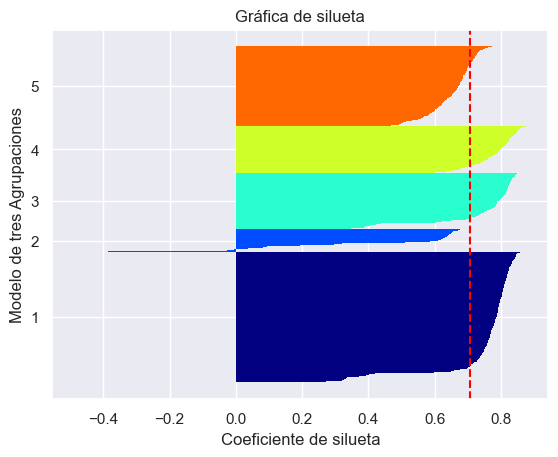

Silhouette Avg:  0.7058016022705469


In [317]:
agg_clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels = agg_clustering.fit_predict(data_normalized)

plot_silhouette(data = data_normalized,
                labels = labels,
                ylabel = 'Modelo de tres Agrupaciones')

## 3) Validación Cuantitativa

## 4) Validación Cualitativa